# Coverage using GenomeCov class (bedtools module)

Illustrative example of the Coverage module with interactive widget to see effect of the running median window length

In [10]:
%pylab inline
from sequana import GenomeCov, sequana_data

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [11]:
gc = GenomeCov(sequana_data("virus.bed", "data"))

In [12]:
w_gc = 100

In [13]:
reference = sequana_data("pKM2-eGFP.fa", "data")

In [14]:
gc.compute_gc_content(reference, w_gc)

In [15]:
chrom = gc[0]

In [16]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [17]:
def f(N):
    chrom.running_median(N, circular=True)
    chrom.compute_zscore()
    chrom.plot_coverage()
    ylim([1000,5500])

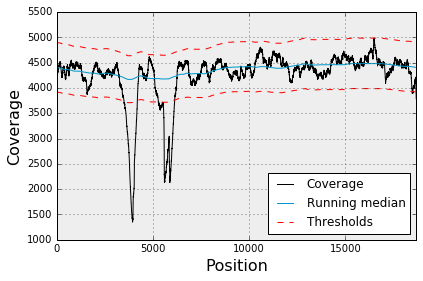

In [18]:
interact(f, N=widgets.IntSlider(min=101,max=16001, step=200))